In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Configure plots 
sns.set(style="whitegrid", palette="muted") 
plt.rcParams["figure.figsize"] = (10,6)

data = pd.read_csv("../data/flight_data.csv")

data

,flight_number,airline,airline_code,airline_country,origin_airport,origin_city,origin_country,dest_airport,dest_city,dest_country,...,stops,cabin_class,fare_type,price_usd,seats_available,aircraft_type,departure_time,flight_category,month,season
0,YK2808,Cyprus Turkish Airlines,YK,Turkey,OVB,Novosibirsk,Russia,FRU,Bishkek,Kyrgyzstan,...,0,Economy,Flexible,276.07,53,146,23:15,Moyen-courrier (500-2000 km),5,normal
1,UY6784,Cameroon Airlines,UY,Cameroon,TBS,Tbilisi,Georgia,BGW,Baghdad,Iraq,...,0,Economy,Non-Refundable,175.19,72,M83,12:15,Moyen-courrier (500-2000 km),7,peak
2,W68534,Wizz Air,W6,Hungary,GLA,Glasgow,United Kingdom,GDN,Gdansk,Poland,...,0,Business,Full-Fare,1100.18,41,320,7:15,Moyen-courrier (500-2000 km),12,peak
3,LH8106,Lufthansa Cargo,LH,Germany,NUE,Nuernberg,Germany,ZRH,Zurich,Switzerland,...,0,Economy,Semi-Flexible,94.45,91,AR1 100,20:15,Court-courrier (< 500 km),3,normal
4,TR231,Tiger Airways,TR,Singapore,SIN,Singapore,Singapore,CRK,Angeles City,Philippines,...,0,Economy,Non-Refundable,190.34,60,320,13:45,Long-courrier (2000-6000 km),10,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,AA5194,American Airlines,AA,United States,PHL,Philadelphia,United States,CUN,Cancun,Mexico,...,0,Economy,Non-Refundable,99.05,19,757 332 321 319,15:30,Long-courrier (2000-6000 km),1,normal
99996,X37597,TUIfly,X3,Germany,RHO,Rhodos,Greece,STR,Stuttgart,Germany,...,0,Business,Non-Refundable,678.11,18,73H,7:15,Long-courrier (2000-6000 km),12,peak
99997,MH9636,Malaysia Airlines,MH,Malaysia,KUL,Kuala Lumpur,Malaysia,DRW,Darwin,Australia,...,0,Business,Full-Fare,2422.93,16,738,22:15,Long-courrier (2000-6000 km),12,normal
99998,U27219,United Feeder Service,U2,United States,BUD,Budapest,Hungary,LGW,London,United Kingdom,...,0,Premium Economy,Non-Refundable,784.57,15,319,7:30,Moyen-courrier (500-2000 km),12,normal


In [3]:
#inputs = airline / origin_country/ origin_country / dest_airport / dest_country/ flight_date / departure_time / cabin_class / stops / dest_city / origin_city
#output = price_usd / duration
#deleted = flight_number / airline_code / airline_country / duration_hours / fare_type // aircraft_type / departure_hour /departure_minute / flight_category / seats_available / origin_airport / dest_airport

In [4]:
data.drop(["flight_number","airline_code","airline_country","duration_hours","fare_type","departure_minute","departure_hour","flight_category","seats_available", "dest_airport"], axis= 1, inplace=True)


In [5]:
data

,airline,origin_airport,origin_city,origin_country,dest_city,dest_country,distance_km,flight_date,duration,stops,cabin_class,price_usd,aircraft_type,departure_time,month,season
0,Cyprus Turkish Airlines,OVB,Novosibirsk,Russia,Bishkek,Kyrgyzstan,1454.04,5/8/2025,2h 29m,0,Economy,276.07,146,23:15,5,normal
1,Cameroon Airlines,TBS,Tbilisi,Georgia,Baghdad,Iraq,936.93,7/16/2025,1h 59m,0,Economy,175.19,M83,12:15,7,peak
2,Wizz Air,GLA,Glasgow,United Kingdom,Gdansk,Poland,1458.59,12/31/2025,2h 49m,0,Business,1100.18,320,7:15,12,peak
3,Lufthansa Cargo,NUE,Nuernberg,Germany,Zurich,Switzerland,293.05,3/1/2025,1h 05m,0,Economy,94.45,AR1 100,20:15,3,normal
4,Tiger Airways,SIN,Singapore,Singapore,Angeles City,Philippines,2381.64,10/21/2025,3h 51m,0,Economy,190.34,320,13:45,10,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,American Airlines,PHL,Philadelphia,United States,Cancun,Mexico,2367.80,1/13/2025,3h 53m,0,Economy,99.05,757 332 321 319,15:30,1,normal
99996,TUIfly,RHO,Rhodos,Greece,Stuttgart,Germany,2052.24,12/31/2025,3h 20m,0,Business,678.11,73H,7:15,12,peak
99997,Malaysia Airlines,KUL,Kuala Lumpur,Malaysia,Darwin,Australia,3636.11,12/4/2025,4h 59m,0,Business,2422.93,738,22:15,12,normal
99998,United Feeder Service,BUD,Budapest,Hungary,London,United Kingdom,1465.13,12/13/2025,2h 46m,0,Premium Economy,784.57,319,7:30,12,normal


In [6]:
data["flight_date"].unique()

<StringArray>
[  '5/8/2025',  '7/16/2025', '12/31/2025',   '3/1/2025', '10/21/2025',
  '6/16/2025',   '6/6/2025',  '3/17/2025',  '5/29/2025',  '11/6/2025',
 ...
  '6/11/2025',  '7/19/2025',  '2/11/2025',  '8/15/2025',  '5/23/2025',
 '10/24/2025',  '2/25/2025',  '7/13/2025',   '8/2/2025',   '4/6/2025']
Length: 365, dtype: str

In [13]:
print(data.shape)
print(data.info())
data.head()

(100000, 26)
<class 'pandas.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   flight_number     100000 non-null  str    
 1   airline           100000 non-null  str    
 2   airline_code      100000 non-null  str    
 3   airline_country   100000 non-null  str    
 4   origin_airport    100000 non-null  str    
 5   origin_city       100000 non-null  str    
 6   origin_country    100000 non-null  str    
 7   dest_airport      100000 non-null  str    
 8   dest_city         100000 non-null  str    
 9   dest_country      100000 non-null  str    
 10  distance_km       100000 non-null  float64
 11  flight_date       100000 non-null  str    
 12  departure_hour    100000 non-null  int64  
 13  departure_minute  100000 non-null  int64  
 14  duration          100000 non-null  str    
 15  duration_hours    100000 non-null  float64
 16  stops             1

,flight_number,airline,airline_code,airline_country,origin_airport,origin_city,origin_country,dest_airport,dest_city,dest_country,...,stops,cabin_class,fare_type,price_usd,seats_available,aircraft_type,departure_time,flight_category,month,season
0,YK2808,Cyprus Turkish Airlines,YK,Turkey,OVB,Novosibirsk,Russia,FRU,Bishkek,Kyrgyzstan,...,0,Economy,Flexible,276.07,53,146,23:15,Moyen-courrier (500-2000 km),5,normal
1,UY6784,Cameroon Airlines,UY,Cameroon,TBS,Tbilisi,Georgia,BGW,Baghdad,Iraq,...,0,Economy,Non-Refundable,175.19,72,M83,12:15,Moyen-courrier (500-2000 km),7,peak
2,W68534,Wizz Air,W6,Hungary,GLA,Glasgow,United Kingdom,GDN,Gdansk,Poland,...,0,Business,Full-Fare,1100.18,41,320,7:15,Moyen-courrier (500-2000 km),12,peak
3,LH8106,Lufthansa Cargo,LH,Germany,NUE,Nuernberg,Germany,ZRH,Zurich,Switzerland,...,0,Economy,Semi-Flexible,94.45,91,AR1 100,20:15,Court-courrier (< 500 km),3,normal
4,TR231,Tiger Airways,TR,Singapore,SIN,Singapore,Singapore,CRK,Angeles City,Philippines,...,0,Economy,Non-Refundable,190.34,60,320,13:45,Long-courrier (2000-6000 km),10,normal


In [14]:
missing = data.isnull().sum().sort_values(ascending=False)
print(missing)

flight_number       0
airline             0
airline_code        0
airline_country     0
origin_airport      0
origin_city         0
origin_country      0
dest_airport        0
dest_city           0
dest_country        0
distance_km         0
flight_date         0
departure_hour      0
departure_minute    0
duration            0
duration_hours      0
stops               0
cabin_class         0
fare_type           0
price_usd           0
seats_available     0
aircraft_type       0
departure_time      0
flight_category     0
month               0
season              0
dtype: int64


In [16]:
print("Duplicates:", data.duplicated().sum())

Duplicates: 0


Text(0.5, 1.0, 'Price vs Distance (km)')

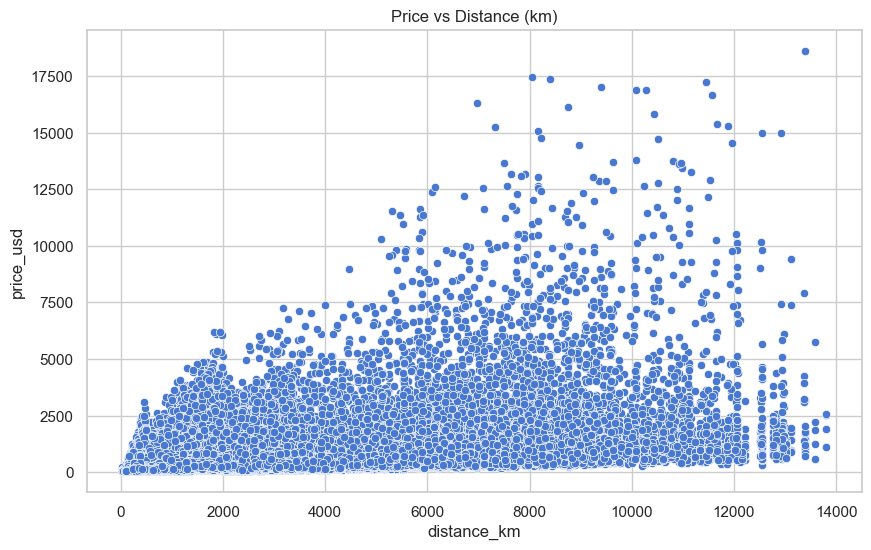

In [27]:
sns.scatterplot(x="distance_km", y="price_usd", data=data)
plt.title("Price vs Distance (km)")

Text(0.5, 1.0, 'Price Distribution by Cabin Class')

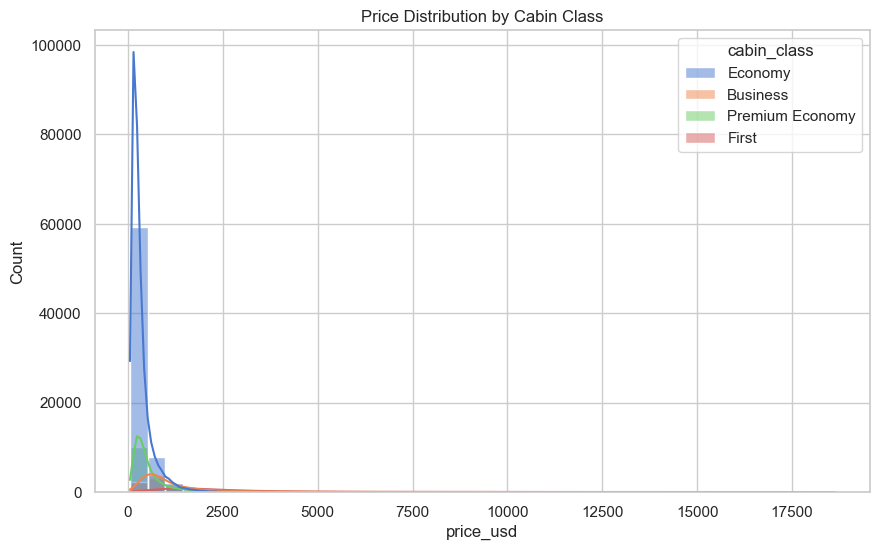

In [34]:
sns.histplot(data=data, x="price_usd", hue="cabin_class", kde=True, bins=40) 
plt.title("Price Distribution by Cabin Class")

Text(0.5, 1.0, 'Average Price by Month')

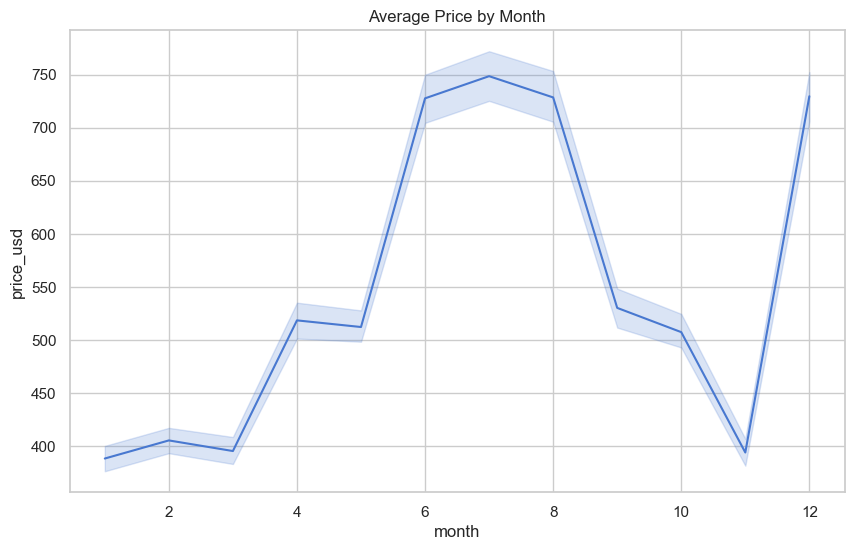

In [36]:
sns.lineplot(x="month", y="price_usd", data=data, estimator=np.mean) 
plt.title("Average Price by Month")

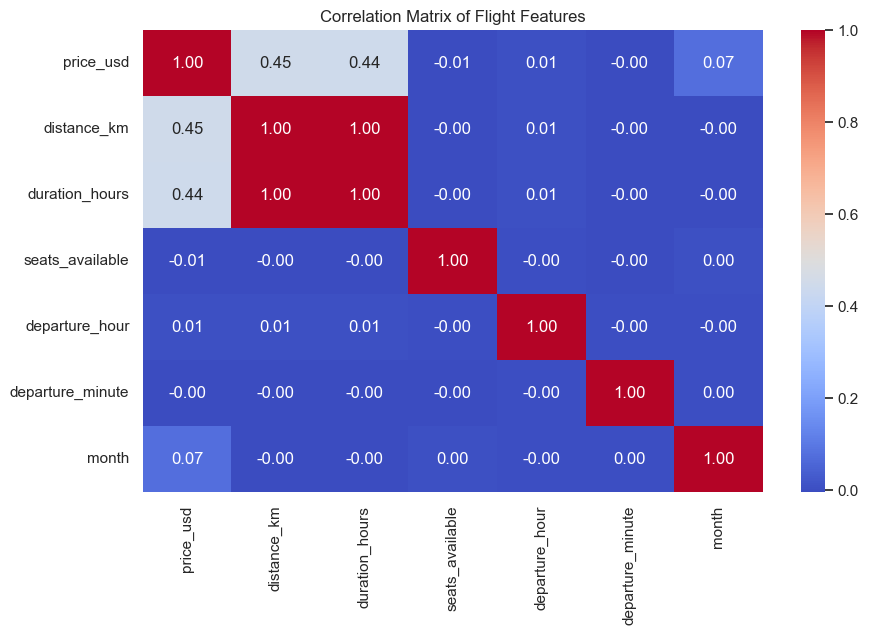

In [ ]:
num_cols = [ 
    "price_usd",
    "distance_km",
    "duration_hours",
    "seats_available",
    "departure_hour",
    "departure_minute",
    "month" ] 
 
corr = data[num_cols].corr() 

plt.figure(figsize=(10,6)) 
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f") 
plt.title("Correlation Matrix of Flight Features") 
plt.show()